### Label Encoding and One-hot Encoding

In [5]:
import pandas as pd
#Create a test dataframe
df = pd.DataFrame([
       ['green', 'Chevrolet', 2017],
       ['blue', 'BMW', 2015], 
       ['yellow', 'Lexus', 2018],
])
df.columns = ['color', 'make', 'year']

from sklearn.preprocessing import LabelEncoder
le_color = LabelEncoder()
le_make = LabelEncoder()
df['color_encoded'] = le_color.fit_transform(df.color)
df['make_encoded'] = le_make.fit_transform(df.make)
print("\nOriginal Data:\n",df)

from sklearn.preprocessing import OneHotEncoder
color_ohe = OneHotEncoder()
make_ohe = OneHotEncoder()
X = color_ohe.fit_transform(df.color_encoded.values.reshape(-1,1)).toarray()
Xm = make_ohe.fit_transform(df.make_encoded.values.reshape(-1,1)).toarray()

dfOneHot = pd.DataFrame(X, columns = ["Color_"+str(int(i)) for i in range(X.shape[1])])
df = pd.concat([df, dfOneHot], axis=1)
dfOneHot = pd.DataFrame(Xm, columns = ["Make"+str(int(i)) for i in range(X.shape[1])])
df = pd.concat([df, dfOneHot], axis=1)
df = df.drop("Color_2",1)
df = df.drop("Make2",1)
print("\nEncoded Data:\n",df)


Original Data:
     color       make  year  color_encoded  make_encoded
0   green  Chevrolet  2017              1             1
1    blue        BMW  2015              0             0
2  yellow      Lexus  2018              2             2

Encoded Data:
     color       make  year  color_encoded  make_encoded  Color_0  Color_1  \
0   green  Chevrolet  2017              1             1      0.0      1.0   
1    blue        BMW  2015              0             0      1.0      0.0   
2  yellow      Lexus  2018              2             2      0.0      0.0   

   Make0  Make1  
0    0.0    1.0  
1    1.0    0.0  
2    0.0    0.0  


### Standardization

In [7]:
import pandas as pd
import numpy as np
df = pd.io.parsers.read_csv('https://raw.githubusercontent.com/rasbt/pattern_classification/master/data/wine_data.csv',header=None,usecols=[0,1,2])
df.columns=['Class label', 'Alcohol', 'Malic acid']
print(df)

from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(df[['Alcohol', 'Malic acid']])
df_std = std_scale.transform(df[['Alcohol', 'Malic acid']])
df=np.array(df.values)

print('Mean before standardization:\nAlcohol={:.2f}, Malic acid={:.2f}'.format(df[:,1].mean(), df[:,0].mean()))
print('\nMean after standardization:\nAlcohol={:.2f}, Malic acid={:.2f}'.format(df_std[:,0].mean(), df_std[:,1].mean()))
print('\nStandard deviation before standardization:\nAlcohol={:.2f}, Malic acid={:.2f}'.format(df[:,1].std(), df[:,0].std()))
print('\nStandard deviation after standardization:\nAlcohol={:.2f}, Malic acid={:.2f}'.format(df_std[:,0].std(), df_std[:,1].std()))

     Class label  Alcohol  Malic acid
0              1    14.23        1.71
1              1    13.20        1.78
2              1    13.16        2.36
3              1    14.37        1.95
4              1    13.24        2.59
5              1    14.20        1.76
6              1    14.39        1.87
7              1    14.06        2.15
8              1    14.83        1.64
9              1    13.86        1.35
10             1    14.10        2.16
11             1    14.12        1.48
12             1    13.75        1.73
13             1    14.75        1.73
14             1    14.38        1.87
15             1    13.63        1.81
16             1    14.30        1.92
17             1    13.83        1.57
18             1    14.19        1.59
19             1    13.64        3.10
20             1    14.06        1.63
21             1    12.93        3.80
22             1    13.71        1.86
23             1    12.85        1.60
24             1    13.50        1.81
25          

### Normalization 

(-2.0, 8.0)

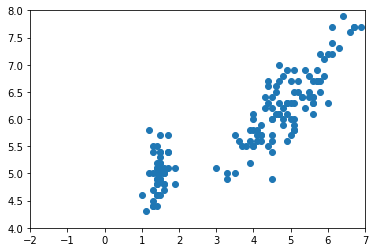

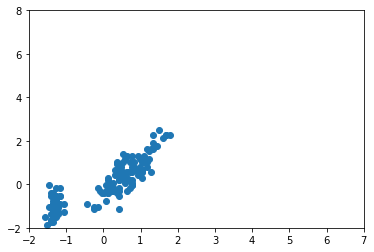

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
df=pd.read_csv("iris.csv") # import data
df = df[["petal.length", "sepal.length"]] # feature selection

X_not_norm = df.values # inputs (NOT normalized)
# visualizing:
fig,ax = plt.subplots()
ax.scatter(X_not_norm[:,0], X_not_norm[:,1])
ax.set_xlim([-2, 7])
ax.set_ylim([4, 8])

X_norm = preprocessing.scale(df) # normalized inputs
# visualizing:
fig,ax = plt.subplots()
ax.scatter(X_norm[:,0], X_norm[:,1])
ax.set_xlim([-2, 7])
ax.set_ylim([-2, 8])

### Data Imputation 

In [5]:
import numpy as np
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit([[np.nan, 2, 3], [4, np.nan, 6], [10, np.nan, 9]])
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_mode.fit([[np.nan, 2, 3], [4, np.nan, 6], [10, np.nan, 9]])
imp_constant = SimpleImputer(missing_values=np.nan, strategy='constant',fill_value=1)
imp_constant.fit([[np.nan, 2, 3], [4, np.nan, 6], [10, np.nan, 9]])

X = [[np.nan, 2, 3], [4, np.nan, 6], [10, np.nan, 9]]
print(X,"\n")
print(imp_mean.transform(X))
print(imp_mode.transform(X))
print(imp_constant.transform(X)) 

[[nan, 2, 3], [4, nan, 6], [10, nan, 9]] 

[[ 7.  2.  3.]
 [ 4.  2.  6.]
 [10.  2.  9.]]
[[ 4.  2.  3.]
 [ 4.  2.  6.]
 [10.  2.  9.]]
[[ 1.  2.  3.]
 [ 4.  1.  6.]
 [10.  1.  9.]]


### Oversampling 

Counter({0: 9900, 1: 100})


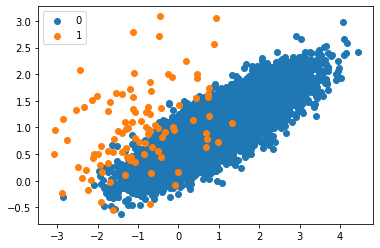

In [6]:
# Generate and plot a synthetic imbalanced classification dataset
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

Counter({0: 9900, 1: 100})
Counter({0: 9900, 1: 9900})


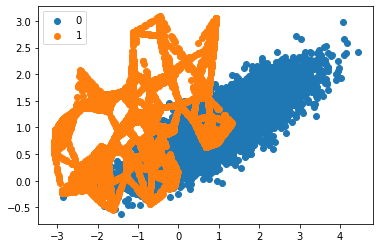

In [7]:
# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

### Area under ROC curve

Chance: ROC AUC=0.500
Logistic: ROC AUC=0.903


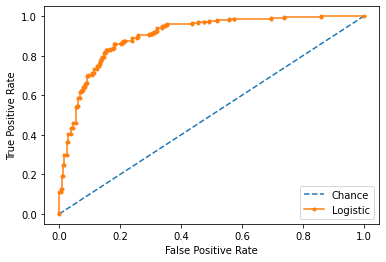

In [3]:
%matplotlib inline
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)

# generate a chance prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
print('Chance: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Chance')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()